In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../Data/clean/london_crime_and_house_price_data_2012-16.csv")

In [3]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,month_name,average_house_price
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,November,363662.25
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,November,371158.48
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,May,377117.73
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,March,388150.79
4,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5,May,310930.90


In [4]:
#Which regions have the highest/ lowest number of crimes? 

In [5]:
borough_crime_count= data.groupby(['borough']).agg({'value':'sum'})
borough_crime_count

,value
borough,
Barking and Dagenham,80262
Barnet,117375
Bexley,59895
Brent,126118
Bromley,99036
Camden,145765
City of London,711
Croydon,141791
Ealing,133101


In [6]:
borough_crime_count[borough_crime_count.value == borough_crime_count.value.max()]

,value
borough,
Westminster,256367


In [7]:
borough_crime_count[borough_crime_count.value == borough_crime_count.value.min()]

,value
borough,
City of London,711


In [8]:
#Create a stacked plot of crime count in each borough 
borough_crime = data[['borough', 'major_category','value']]
borough_crime=borough_crime.groupby(['borough', 'major_category']).agg({'value':'sum'}).reset_index()
borough_crime.head(10)

,borough,major_category,value
0,Barking and Dagenham,Burglary,9467
1,Barking and Dagenham,Criminal Damage,8739
2,Barking and Dagenham,Drugs,4694
3,Barking and Dagenham,Fraud or Forgery,0
4,Barking and Dagenham,Other Notifiable Offences,1580
5,Barking and Dagenham,Robbery,2853
6,Barking and Dagenham,Sexual Offences,0
7,Barking and Dagenham,Theft and Handling,28386
8,Barking and Dagenham,Violence Against the Person,24543
9,Barnet,Burglary,19968


In [9]:
borough_crime= borough_crime.set_index(['borough','major_category'])

Text(0.5, 1.0, 'Crimes per Borough')

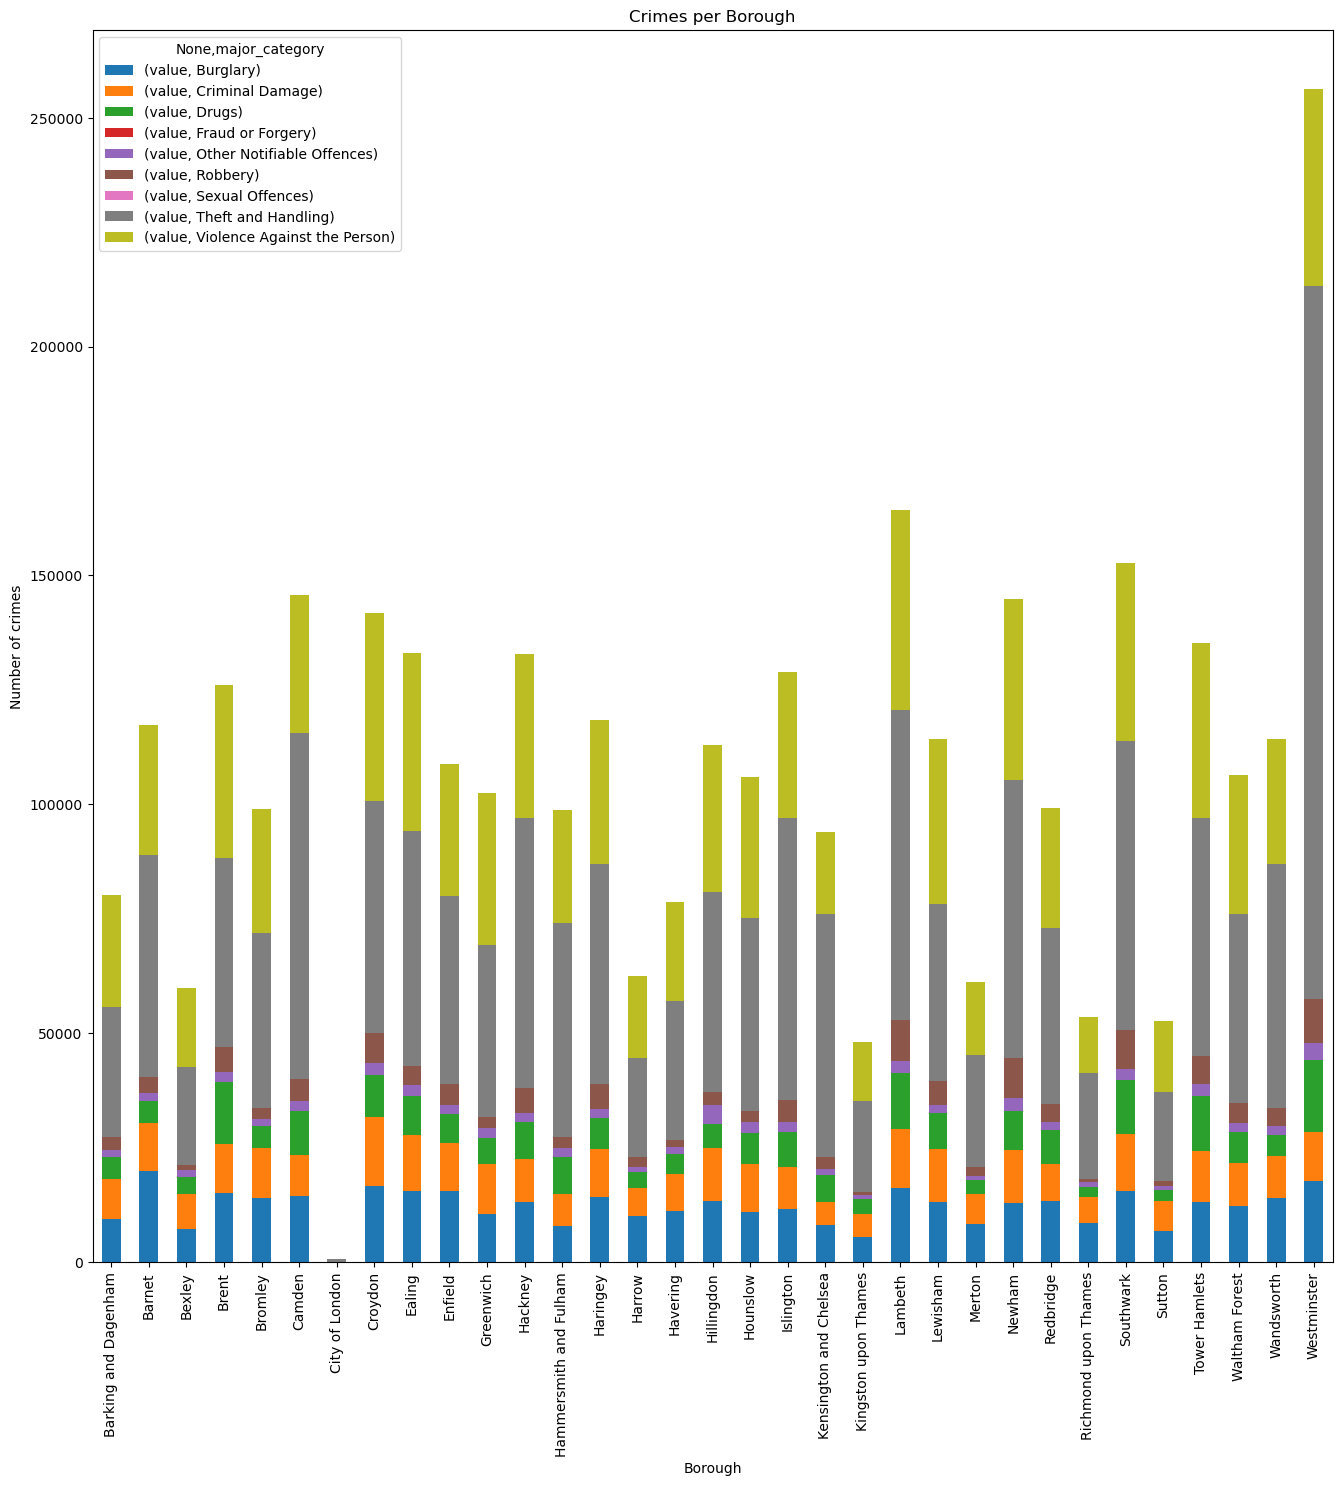

In [10]:
borough_crime.unstack().plot(kind='bar',stacked=True, figsize=(16,16))
plt.xlabel('Borough')
plt.ylabel('Number of crimes')
plt.title('Crimes per Borough')

In [11]:
#Westminster has the highest number of crimes compared to the City of London with the least amount of crimes.

In [12]:
#What are the most commonly committed crimes?

In [13]:
crime_category=data.groupby(['major_category']).agg({'value':'sum'})
crime_category=crime_category.rename(columns={'value':'number_of_crimes'})
crime_category.sort_values('number_of_crimes')

,number_of_crimes
major_category,
Fraud or Forgery,0
Sexual Offences,0
Other Notifiable Offences,64561
Robbery,130658
Drugs,225188
Criminal Damage,304690
Burglary,395441
Violence Against the Person,932665
Theft and Handling,1498461


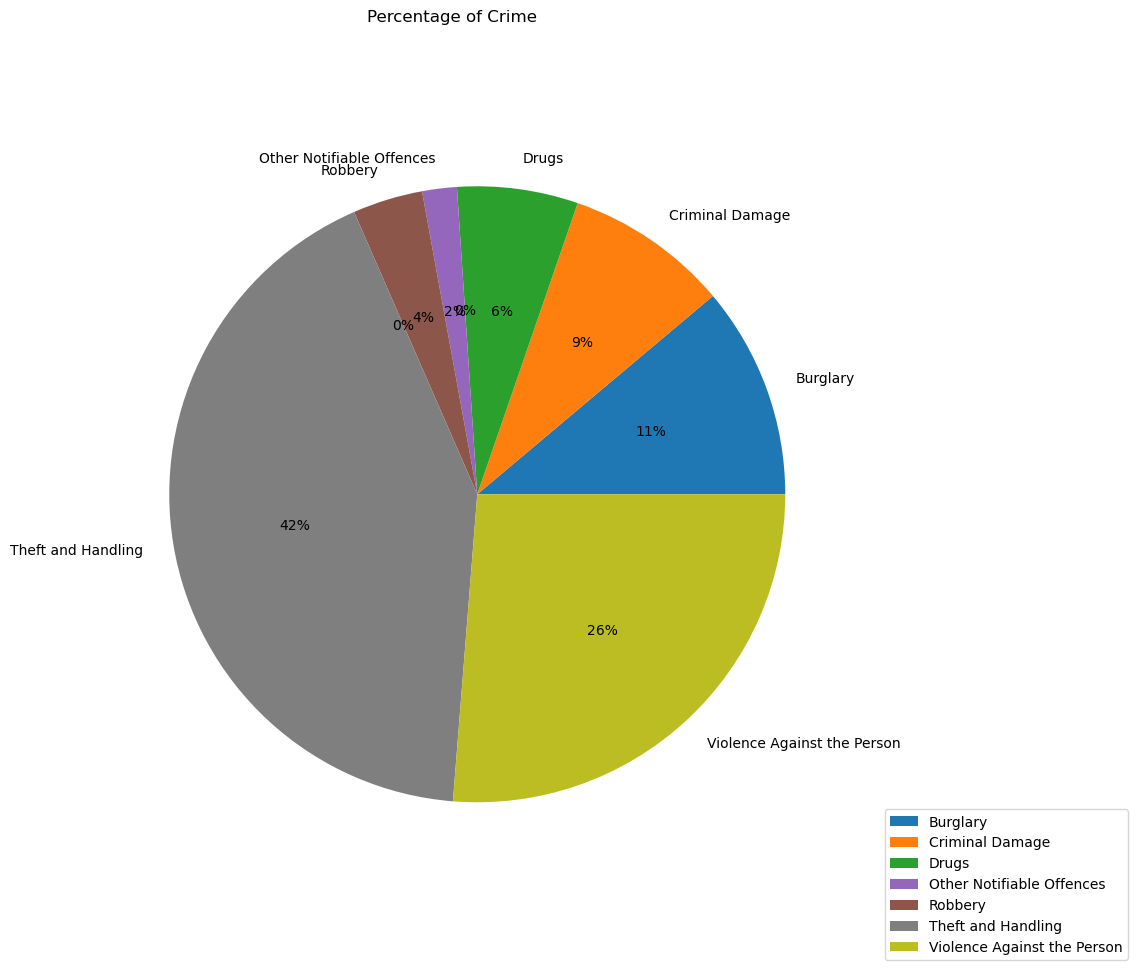

In [14]:
crime_category.plot.pie(subplots=True, figsize=(20,10),autopct='%1.0f%%',title='Percentage of Crime',ylabel="")
plt.legend(bbox_to_anchor=(1.02,0.1), loc='upper left')

In [15]:
#Theft and handling is the most commonly committed crime. 

In [16]:
#Does seasonality affect crime rate? 

In [17]:
seasonality = data.groupby(['month_name','year']).agg({'value':'sum'})


In [18]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
seasonality=seasonality.sort_values('month_name', key = lambda x : x.apply (lambda x : month_dict[x]))
seasonality=seasonality.rename(columns={'value':'number_of_crimes'})
seasonality.reset_index()

,month_name,year,number_of_crimes
0,January,2016,58847
1,January,2015,57055
2,January,2014,55515
3,January,2013,58933
4,January,2012,62436
5,February,2016,56697
6,February,2015,53316
7,February,2014,51222
8,February,2013,55271
9,February,2012,56735


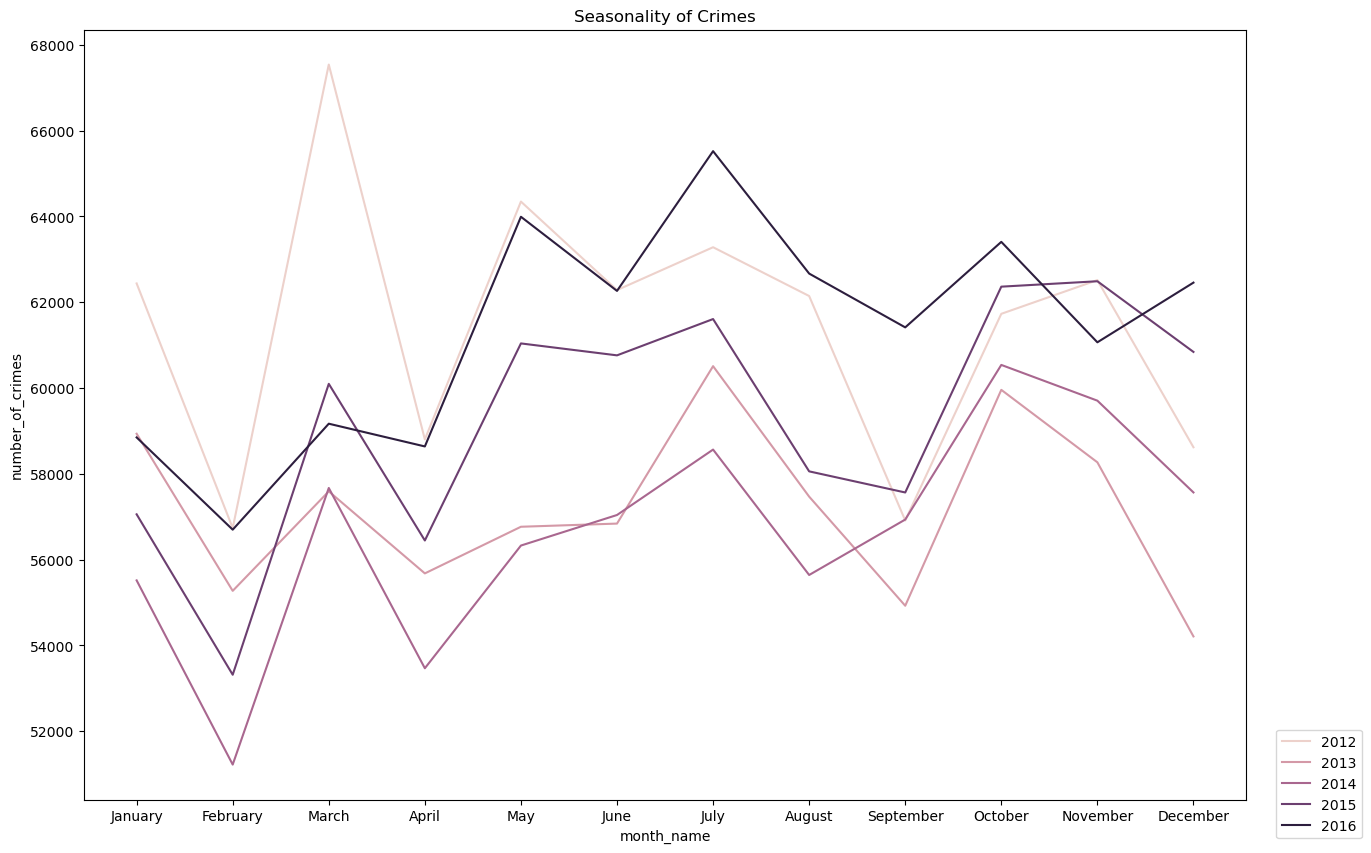

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=seasonality, x='month_name', y='number_of_crimes', hue='year').set(title='Seasonality of Crimes')
plt.legend(bbox_to_anchor=(1.02,0.1), loc='upper left')

In [20]:
#Generally crime appears to slightly increase across the year excluding March where there is a spike in the number of crimes.

In [21]:
#Is crime rate increasing or decreasing across the years? 

In [22]:
years= data.groupby(['year']).agg({'value':'sum'})
years=years.rename(columns={'value':'number_of_crimes'})
years.reset_index()

,year,number_of_crimes
0,2012,737329
1,2013,686407
2,2014,680183
3,2015,711624
4,2016,736121


([<matplotlib.axis.XTick at 0x16e33d130>,
 [Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016')])

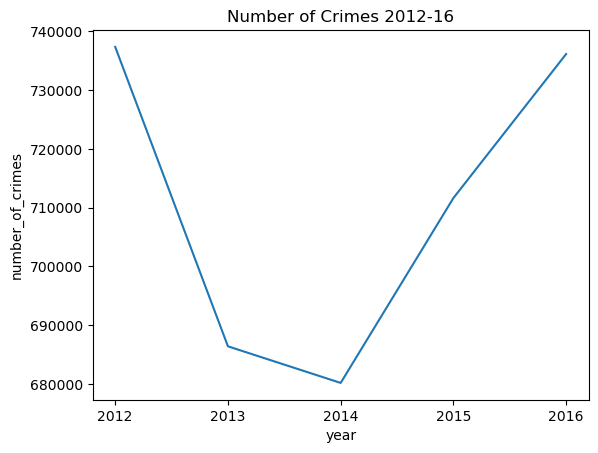

In [23]:
sns.lineplot(data=years, x='year', y='number_of_crimes').set(title='Number of Crimes 2012-16')
plt.xticks(np.arange(2012,2017 ,1))

In [24]:
#Crime rate has seen a drop between 2013-14 however has risen again in 2015 and 2016. 

In [25]:
#Is number of crimes influenced by house price in a region? 

In [26]:
data2 = data.groupby(['borough','year','month_name','average_house_price']).agg({'value':'sum'}).reset_index()
data2=data2.rename(columns={'value':'number_of_crimes'})

In [27]:
data2

,borough,year,month_name,average_house_price,number_of_crimes
0,Barking and Dagenham,2012,April,164731.04,1264
1,Barking and Dagenham,2012,August,166179.70,1269
2,Barking and Dagenham,2012,December,167813.02,1260
3,Barking and Dagenham,2012,February,163607.22,1307
4,Barking and Dagenham,2012,January,163899.02,1437
...,...,...,...,...,...
1975,Westminster,2016,March,971279.33,3703
1976,Westminster,2016,May,1007474.23,3789
1977,Westminster,2016,November,999384.17,4275
1978,Westminster,2016,October,961901.00,4093


<AxesSubplot: xlabel='average_house_price', ylabel='number_of_crimes'>

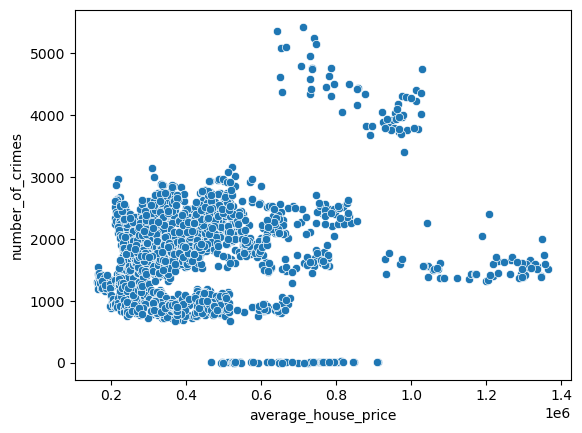

In [28]:
sns.scatterplot(data=data2, x='average_house_price', y='number_of_crimes')

In [29]:
correlation = data2['average_house_price'].corr(data2['number_of_crimes'])
correlation

0.16727052891883057

In [30]:
#Only a weak correlation between average_house price per borough and overall number of crimes. 

In [31]:
#Does burglary increase as house price increase? 

In [32]:
burglary = (data[data['major_category']=='Burglary'])
burglary

,lsoa_code,borough,major_category,minor_category,value,year,month,month_name,average_house_price
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,November,363662.25
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,March,388150.79
22,E01001317,Ealing,Burglary,Burglary in a Dwelling,0,2013,9,September,348838.80
34,E01000869,Camden,Burglary,Burglary in Other Buildings,0,2013,3,March,635099.04
47,E01001600,Greenwich,Burglary,Burglary in Other Buildings,0,2016,11,November,371158.48
...,...,...,...,...,...,...,...,...,...
7494710,E01000148,Barnet,Burglary,Burglary in a Dwelling,0,2015,11,November,499849.95
7494721,E01002290,Havering,Burglary,Burglary in Other Buildings,1,2014,8,August,266686.16
7494758,E01000531,Brent,Burglary,Burglary in a Dwelling,0,2013,1,January,325755.63
7494765,E01003154,Lambeth,Burglary,Burglary in a Dwelling,3,2015,10,October,499210.98


In [33]:
burglary = burglary.groupby(['major_category','year']).agg({'value':'sum','average_house_price':'mean'})
burglary=burglary.rename(columns={'value':'number_of_burglaries'})
burglary.reset_index()


,major_category,year,number_of_burglaries,average_house_price
0,Burglary,2012,93392,331013.931152
1,Burglary,2013,87222,359402.692079
2,Burglary,2014,76053,419472.500597
3,Burglary,2015,70489,457996.895745
4,Burglary,2016,68285,497258.831078


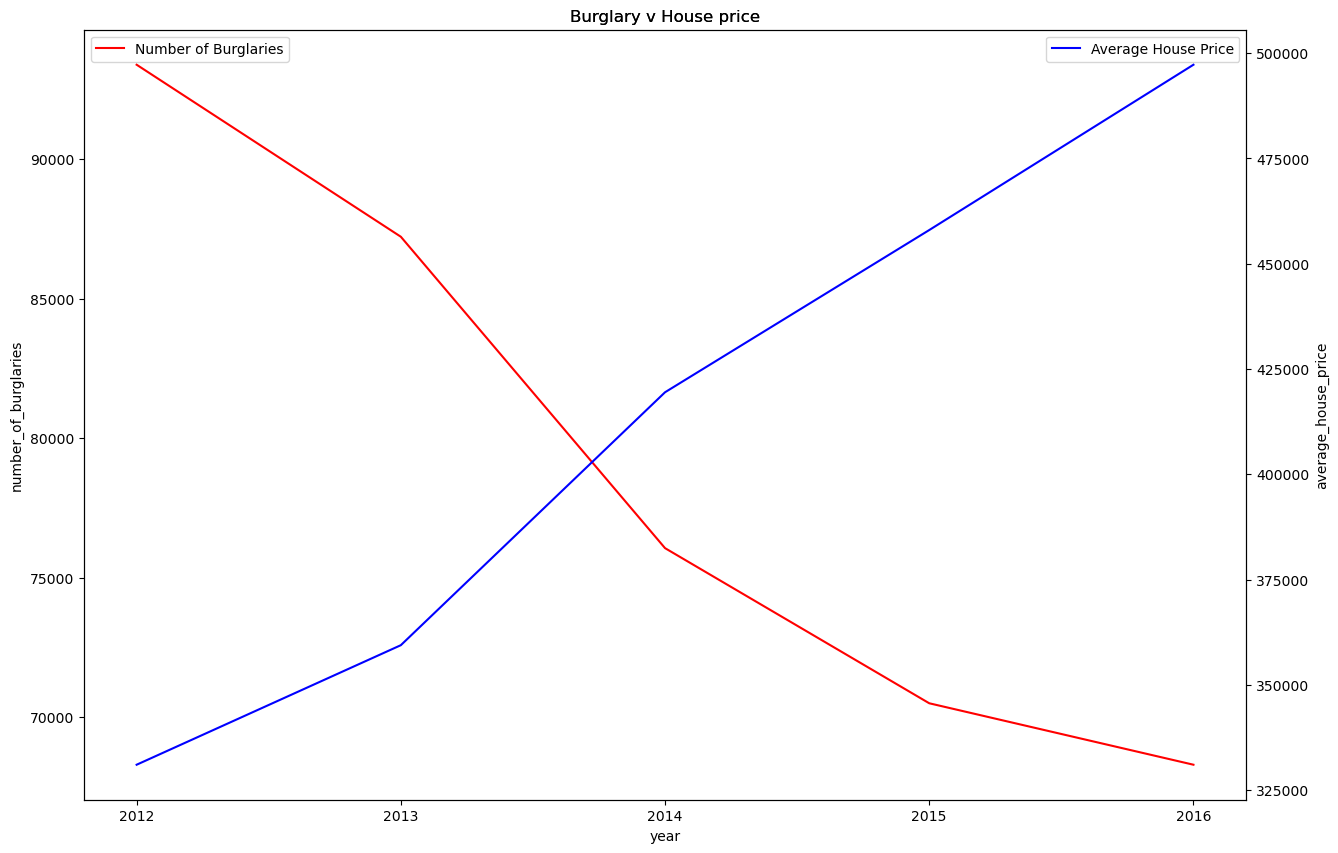

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=burglary, x='year', y='number_of_burglaries',color='red').set(title='Burglary v House price')
plt.legend(labels=['Number of Burglaries'],loc='upper left')
ax2=plt.twinx()
sns.lineplot(data=burglary, x='year', y='average_house_price',color='blue').set(title='Burglary v House price')
plt.xticks(np.arange(2012,2017 ,1))
plt.legend(labels=['Average House Price'], loc='upper right')
#plt.legend()#labels=['Average House price', 'Number of Burglaries'])
#plt.legend(bbox_to_anchor=(1.02,0.1), loc='upper left')